<a href="https://colab.research.google.com/github/bathaeian/oil_wag/blob/main/oil_wag_tba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
df1 = pd.read_excel('/content/drive/MyDrive/oil_wag/tba.xlsx')
print(df1)


     lab1  lab2        d0        d4      d8       d12
0     wal   200  138.0000  389.0000  450.00  560.0000
1     wal   400  123.0000  350.0000  370.00  467.0000
2     wal   800  140.0000  230.0000  256.00  302.0000
3   grape   200  354.5000  436.5000  585.75  433.0000
4   grape   400  197.0000  427.7500  537.25  365.5000
5   grape   800  265.0000  345.2500  479.00  346.7500
6     alm   200  243.5000  282.5000  327.75  502.5000
7     alm   400  190.7500  280.0000  291.75  413.7500
8     alm   800  189.0000  198.0000  253.00  397.2500
9    none     0  119.8333  440.0000  573.25  733.5833
10  ttbhq  1000  149.7500  268.0833  348.00  400.1667


In [9]:
df2= df1[['d0','d4','d8','d12']]
print(df2)
print(df2.describe())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

          d0        d4      d8       d12
0   138.0000  389.0000  450.00  560.0000
1   123.0000  350.0000  370.00  467.0000
2   140.0000  230.0000  256.00  302.0000
3   354.5000  436.5000  585.75  433.0000
4   197.0000  427.7500  537.25  365.5000
5   265.0000  345.2500  479.00  346.7500
6   243.5000  282.5000  327.75  502.5000
7   190.7500  280.0000  291.75  413.7500
8   189.0000  198.0000  253.00  397.2500
9   119.8333  440.0000  573.25  733.5833
10  149.7500  268.0833  348.00  400.1667
               d0          d4          d8         d12
count   11.000000   11.000000   11.000000   11.000000
mean   191.848482  331.553027  406.522727  447.409091
std     71.970067   85.497527  124.304588  119.190894
min    119.833300  198.000000  253.000000  302.000000
25%    139.000000  274.041650  309.750000  381.375000
50%    189.000000  345.250000  370.000000  413.750000
75%    220.250000  408.375000  508.125000  484.750000
max    354.500000  440.000000  585.750000  733.583300


,0,1,2,3
count,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
mean,-5.046468e-16,-5.652044e-16,1.766264e-16,-2.018587e-16
std,1.048809e+00,1.048809e+00,1.048809e+00,1.048809e+00
min,-1.049466e+00,-1.638312e+00,-1.295334e+00,-1.279513e+00
25%,-7.701529e-01,-7.054992e-01,-8.165112e-01,-5.810607e-01
50%,-4.151049e-02,1.680225e-01,-3.081572e-01,-2.961799e-01
75%,4.138910e-01,9.423847e-01,8.572601e-01,3.285778e-01
max,2.370296e+00,1.330333e+00,1.512214e+00,2.518163e+00


In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

[1 1 2 0 0 0 2 2 2 1 2]
[[ 1.17046471  0.87849346  1.07557809 -0.57776088]
 [-0.94583684  0.75377769  0.48847494  1.22709459]
 [-0.13477672 -0.97936269 -0.93843182 -0.38960023]]


/tmp/ipython-input-33-2796997653.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


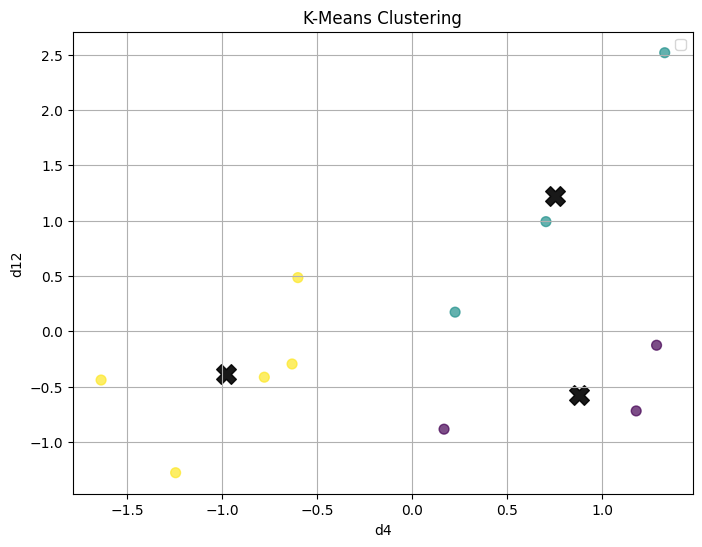

In [33]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
y_kmeans = kmeans.predict(data_scaled)
fh,fv=1,3
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, fh], data_scaled[:, fv], c=y_kmeans, s=50, cmap='viridis', alpha=0.7)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, fh], centers[:, fv], c='black', s=200, alpha=0.9, marker='X')

plt.title('K-Means Clustering')
plt.xlabel(f'd{fh*4}')
plt.ylabel(f'd{fv*4}')
plt.legend()
plt.grid(True)
plt.show()
